## Importing the necessary libraries.

In [2]:
import pandas as pd
import missingno as msno
import numpy as np

## Loading the dataset.

In [3]:
df = pd.read_csv('./dataset/train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.shape

(1460, 81)

## Data cleaning.

### Finding some null values that aren't detected by Pandas.

In [7]:
null_values_dict = {
    "?": np.nan,
    "--": np.nan,
    "-": np.nan
}
df.replace(null_values_dict, inplace=True)

<AxesSubplot:>

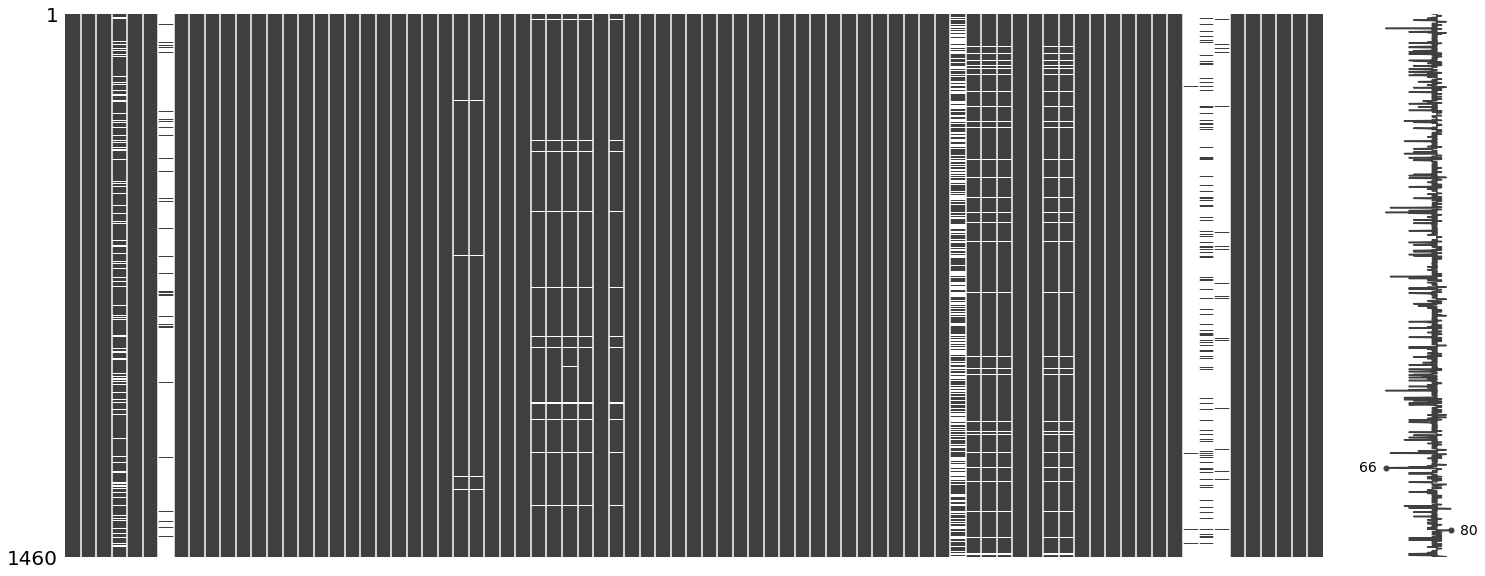

In [8]:
msno.matrix(df)

### Some columns have over 17% null values, so rather than filling so many null values, I opt to simply delete those columns.

In [9]:
print(f"Initial shape : {df.shape}")
for col in df:
    percentage_null = df[col].isnull().sum() * 100 / df.shape[0]
    # print(f"{percentage_null}%", col)
    if percentage_null > 17 : 
        df.drop(col, axis=1, inplace=True)
print(f"Shape after removing columns having excessive null values : {df.shape}")

Initial shape : (1460, 81)
Shape after removing columns having excessive null values : (1460, 75)


### Now check out the null value matrix...

<AxesSubplot:>

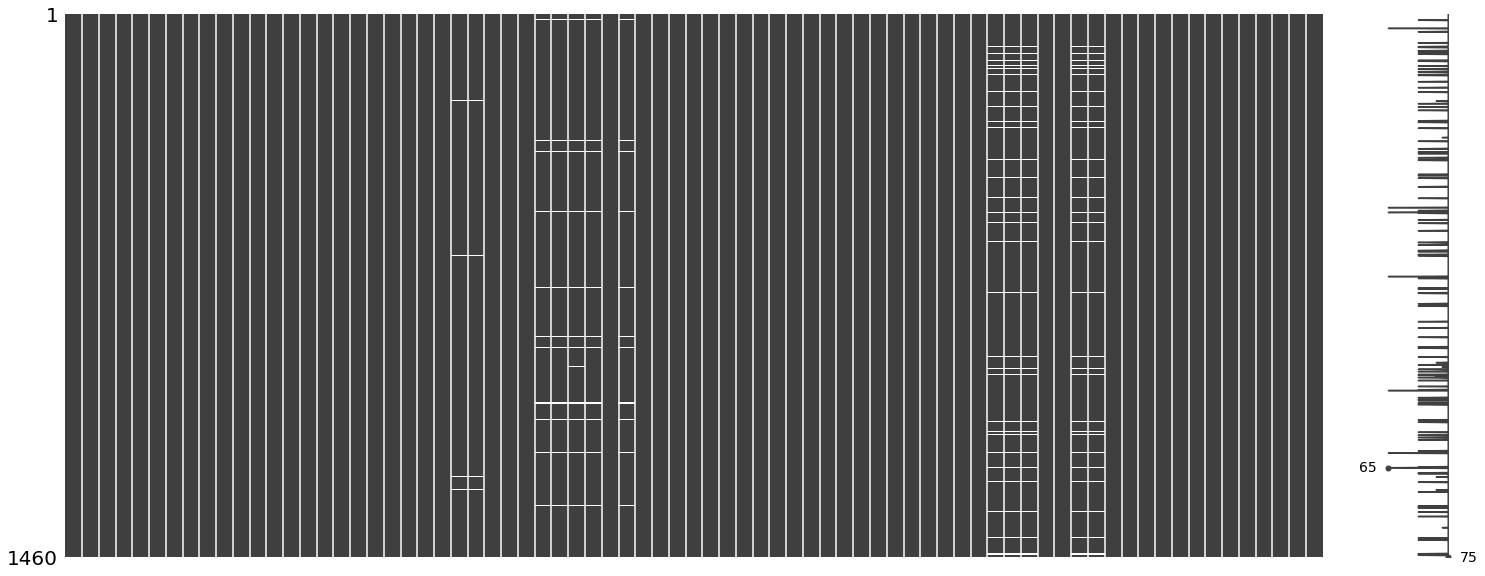

In [10]:
msno.matrix(df)

### I choose to deal with null values as follows:
#### Categorical variables are replaced using mode, and numerical variables are replaced using median.

In [14]:
numerical_dtypes = ['int64', 'float64']
categorical_dtypes = ['object']

In [16]:
test = True
for col in df:
    # print(df[col].dtypes)
    test = test and ((df[col].dtype in numerical_dtypes) or (df[col].dtype in categorical_dtypes))
print(test)

True
